In [1]:
# libabries for data exploration.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# load sales data.
sales = pd.read_csv("../../../Data/future_sales/sales_train.csv")

### Light data exploration

In [6]:
sales.head()

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
0,02.01.2013,0,59,22154,999.00,1.0
1,03.01.2013,0,25,2552,899.00,1.0
2,05.01.2013,0,25,2552,899.00,-1.0
3,06.01.2013,0,25,2554,1709.05,1.0
4,15.01.2013,0,25,2555,1099.00,1.0


In [8]:
sales.tail()

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
2935844,10.10.2015,33,25,7409,299.0,1.0
2935845,09.10.2015,33,25,7460,299.0,1.0
2935846,14.10.2015,33,25,7459,349.0,1.0
2935847,22.10.2015,33,25,7440,299.0,1.0
2935848,03.10.2015,33,25,7460,299.0,1.0


In [10]:
sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2935849 entries, 0 to 2935848
Data columns (total 6 columns):
 #   Column          Dtype  
---  ------          -----  
 0   date            object 
 1   date_block_num  int64  
 2   shop_id         int64  
 3   item_id         int64  
 4   item_price      float64
 5   item_cnt_day    float64
dtypes: float64(2), int64(3), object(1)
memory usage: 134.4+ MB


In [12]:
sales.describe()

,date_block_num,shop_id,item_id,item_price,item_cnt_day
count,2.935849e+06,2.935849e+06,2.935849e+06,2.935849e+06,2.935849e+06
mean,1.456991e+01,3.300173e+01,1.019723e+04,8.908532e+02,1.242641e+00
std,9.422988e+00,1.622697e+01,6.324297e+03,1.729800e+03,2.618834e+00
min,0.000000e+00,0.000000e+00,0.000000e+00,-1.000000e+00,-2.200000e+01
25%,7.000000e+00,2.200000e+01,4.476000e+03,2.490000e+02,1.000000e+00
50%,1.400000e+01,3.100000e+01,9.343000e+03,3.990000e+02,1.000000e+00
75%,2.300000e+01,4.700000e+01,1.568400e+04,9.990000e+02,1.000000e+00
max,3.300000e+01,5.900000e+01,2.216900e+04,3.079800e+05,2.169000e+03


## Light feature engineering

In [15]:
# purpose of this code is to replace dates with equivalent numeric values.
date_dict = dict()
arr = []
counter = 0

for date in sales["date"]:
    if date not in date_dict:
        date_dict[date] = counter 
        counter += 1
    else:
        pass
    
for date in sales["date"]:
    arr.append(date_dict[date])

In [16]:
sales["date_num"] = arr
sales = sales.sort_values("date_num")

In [19]:
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(sales, test_size=0.2, random_state=44)

In [20]:
exploration_data = train_set.copy()
exploration_data["total_sales"] = exploration_data["item_price"] * exploration_data["item_cnt_day"]

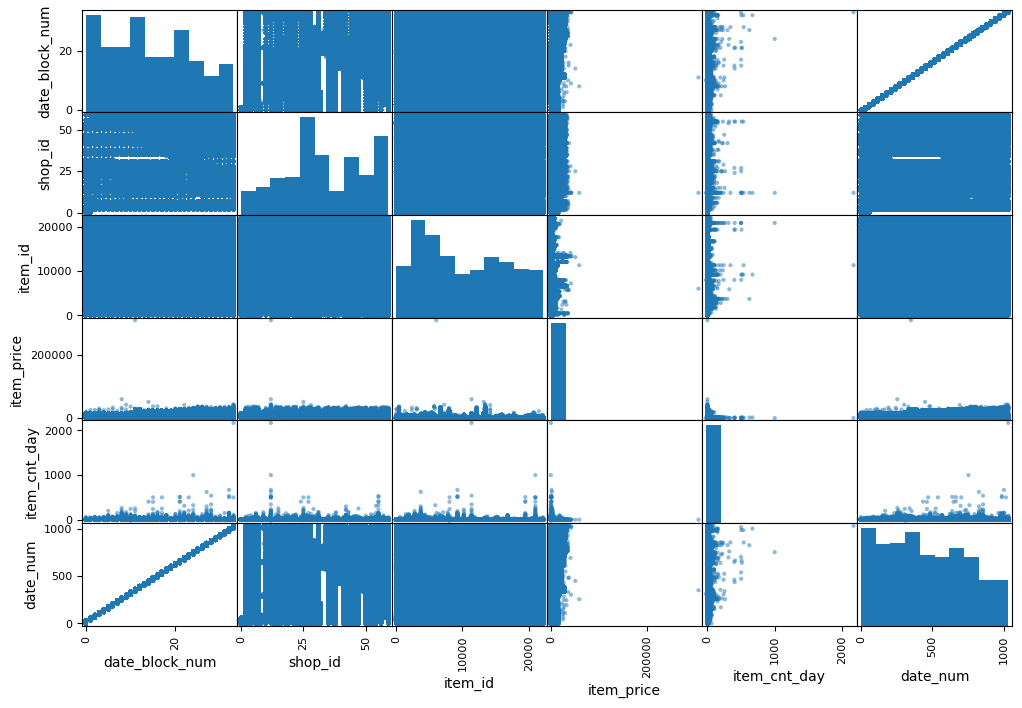

In [21]:
from pandas.plotting import scatter_matrix

attributes = ["date_block_num", "shop_id", "item_id", "item_price", "item_cnt_day", "date_num"]
scatter_matrix(exploration_data[attributes], figsize=(12, 8))
plt.show()

In [22]:
total_sales_month = exploration_data.groupby(by="date_block_num")["total_sales"].sum()

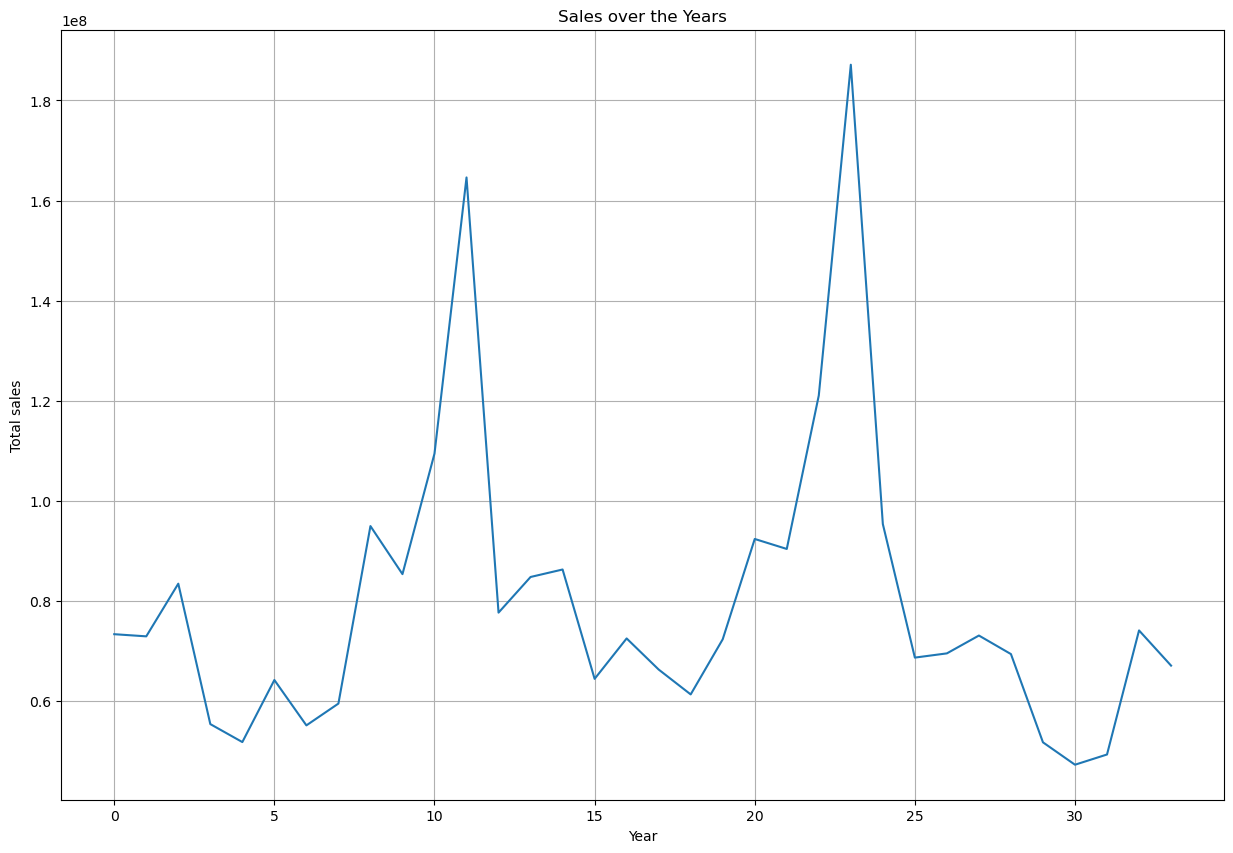

In [23]:
fig, ax = plt.subplots()
fig.set_size_inches(15, 10)
ax.plot(total_sales_month)
ax.set_title("Sales over the Years")
ax.set_xlabel("Year")
ax.set_ylabel("Total sales")
ax.grid()
plt.show()

In [26]:
total_items_month = exploration_data.groupby(by="date_block_num")["item_cnt_day"].sum()

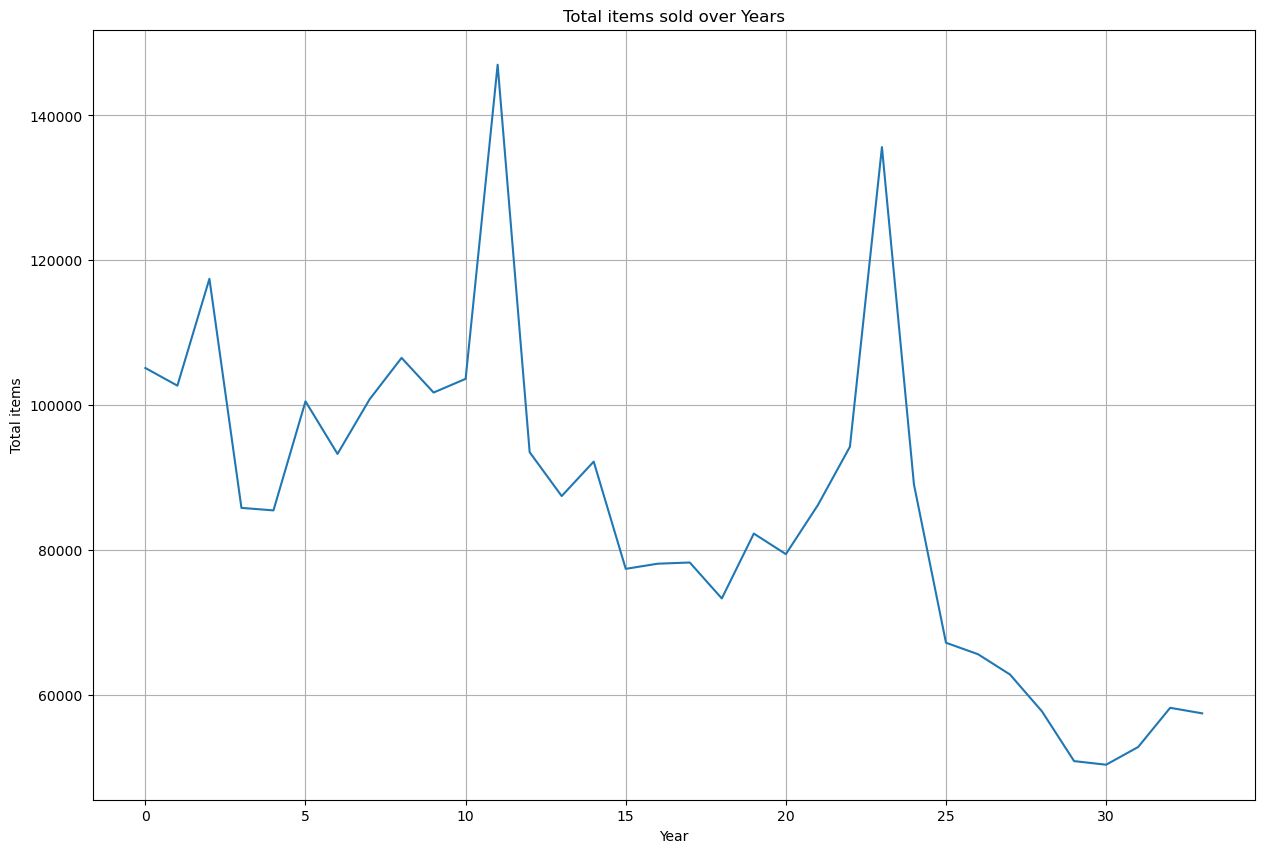

In [27]:
fig, ax = plt.subplots()
fig.set_size_inches(15, 10)
ax.plot(total_items_month)
ax.set_title("Total items sold over Years")
ax.set_xlabel("Year")
ax.set_ylabel("Total items")
ax.grid()
plt.show()

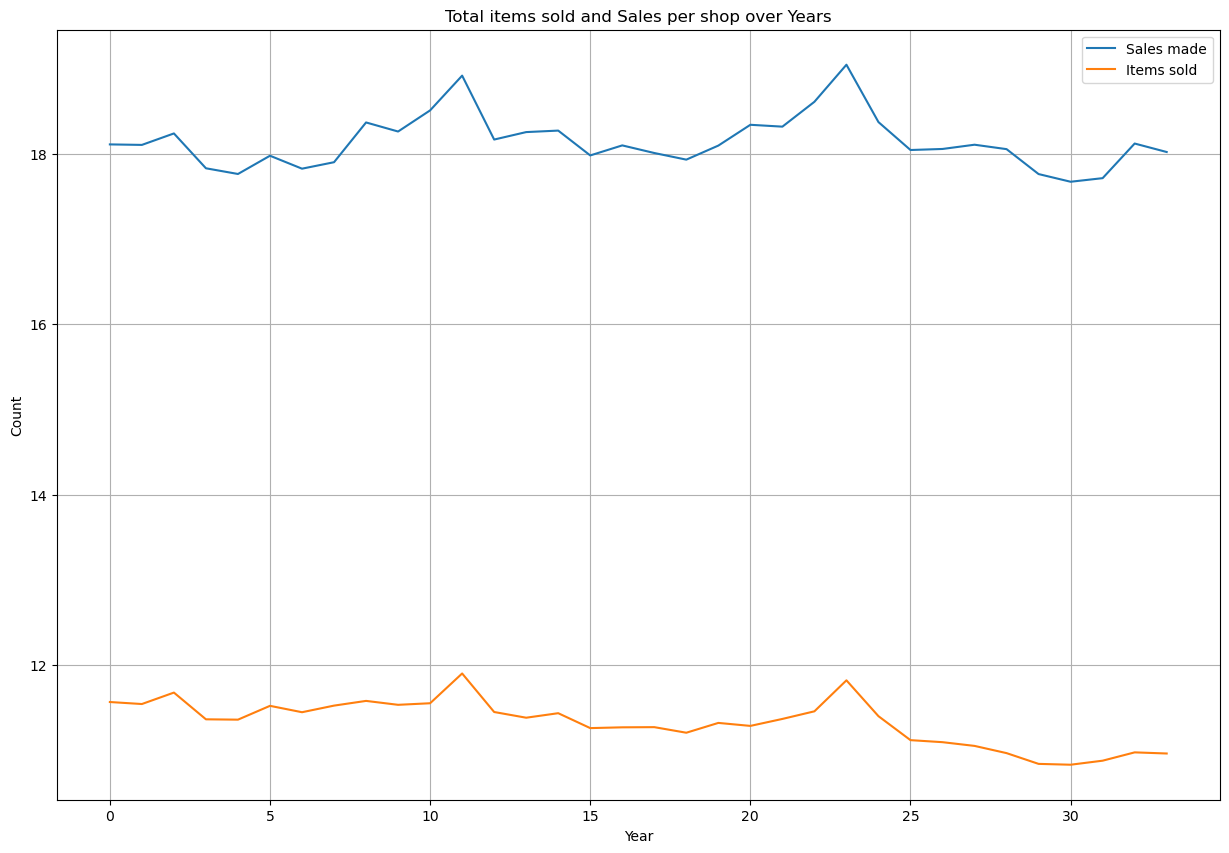

In [28]:
fig, ax = plt.subplots()
fig.set_size_inches(15, 10)
ax.plot(np.log(total_sales_month), label="Sales made")
ax.plot(np.log(total_items_month), label="Items sold")
ax.set_title("Total items sold and Sales per shop over Years")
ax.set_xlabel("Year")
ax.set_ylabel("Count")
ax.legend()
ax.grid()
plt.show()

In [29]:
total_shops_month = exploration_data.groupby(by="shop_id")["total_sales"].sum()

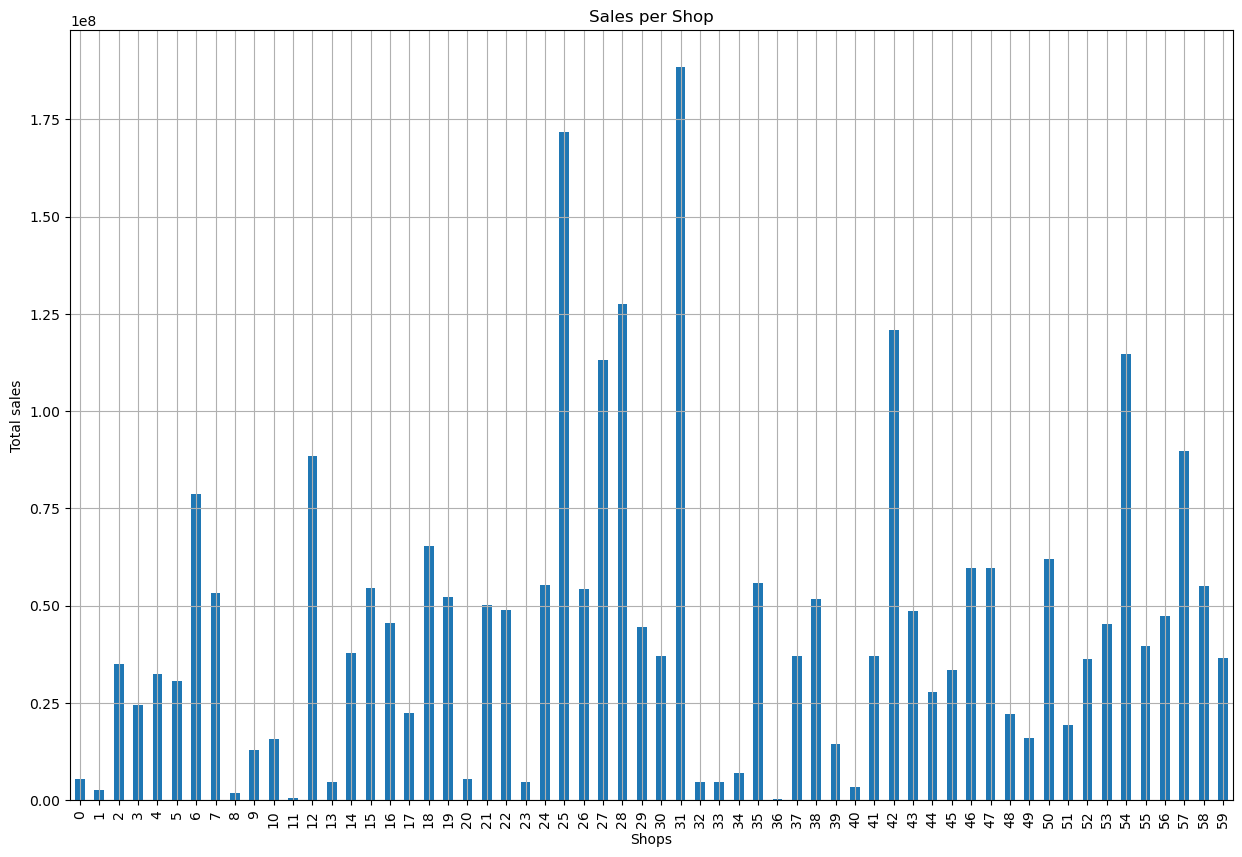

In [30]:
total_shops_month.plot(kind="bar",
                       title="Sales per Shop",
                       xlabel="Shops",
                       ylabel="Total sales",
                       figsize=(15, 10),
                       grid=True
                      )
plt.show()

In [31]:
attributes = ["date_block_num", "shop_id", "item_id", "item_price", "item_cnt_day", "date_num"]
corr_matrix = train_set[attributes].corr()
corr_matrix['item_cnt_day'].sort_values(ascending=False)

item_cnt_day      1.000000
item_id           0.016054
item_price        0.010315
date_block_num    0.009294
date_num          0.009200
shop_id          -0.005135
Name: item_cnt_day, dtype: float64

# Machine Learning models.

## 1. Decision Tree

In [34]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error

In [36]:
from sklearn.model_selection import GridSearchCV

In [38]:
X_train = train_set.loc[:, ["date_num", "shop_id", "item_id", "item_price"]]
y_train = train_set.loc[:, ["item_cnt_day"]]
X_test = test_set.loc[:, ["date_num", "shop_id", "item_id", "item_price"]]
y_test = test_set.loc[:, ["item_cnt_day"]]

In [89]:
param_grid = [{"max_depth": [25],
               "min_samples_leaf": [15],
               "max_leaf_nodes": [7000, 8000, 9000, 10000]}
             ]
tree_reg = DecisionTreeRegressor()
grid_search = GridSearchCV(tree_reg,
                           param_grid,
                           cv=5,
                           scoring="neg_mean_squared_error"
                            )
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(),
             param_grid=[{'max_depth': [25],
                          'max_leaf_nodes': [7000, 8000, 9000, 10000],
                          'min_samples_leaf': [15]}],
             scoring='neg_mean_squared_error')

In [90]:
grid_search.best_estimator_

DecisionTreeRegressor(max_depth=25, max_leaf_nodes=10000, min_samples_leaf=15)

In [200]:
sales_predictions_train = grid_search.predict(X_train)
grid_mse = mean_squared_error(sales_predictions_train, y_train)
grid_rmse = np.sqrt(grid_mse)
grid_rmse

2.317078480788628

In [201]:
sales_predictions_test = grid_search.predict(X_test)
grid_mse = mean_squared_error(sales_predictions_test, y_test)
grid_rmse = np.sqrt(grid_mse)
grid_rmse

1.7715039782971933

In [75]:
# load test data.
unlabeled_test_data = pd.read_csv("../../../Data/future_sales/test.csv")

In [77]:
sales_unique = sales.drop_duplicates(subset=["shop_id","item_id"])

In [79]:
merged_data = pd.merge(unlabeled_test_data, sales_unique,
         how='left', on=['shop_id', 'item_id'])

In [81]:
merged_data = merged_data.loc[:, ["date_num", "shop_id", "item_id", "item_price"]]

In [83]:
arr= []
counter = 1034

for _ in range(len(merged_data)):
    arr.append(counter)
    counter += 1
merged_data["date_num"] = arr

In [85]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy="median")
test_data = imputer.fit_transform(merged_data)

In [91]:
sales_predictions_test_ = grid_search.predict(test_data)

C:\Users\Admin\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(


In [92]:
final_data = unlabeled_test_data.loc[:, ["ID"]]

In [93]:
final_data["item_cnt_day"] = sales_predictions_test_

In [304]:
final_data.to_csv("final_predictions")

In [76]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

LinearRegression()

In [78]:
lin_reg.coef_

array([[ 7.63761321e-05, -9.31277182e-04,  7.65215709e-06,
         1.86382305e-05]])

In [49]:
sales_predictions_train = lin_reg.predict(X_train)
grid_mse = mean_squared_error(sales_predictions_train, y_train)
grid_rmse = np.sqrt(grid_mse)
grid_rmse

2.7303022682486957

In [51]:
sales_predictions_test = lin_reg.predict(X_test)
grid_mse = mean_squared_error(sales_predictions_test, y_test)
grid_rmse = np.sqrt(grid_mse)
grid_rmse

2.1105118673573418

In [53]:
from sklearn.linear_model import SGDRegressor
sgd_reg = SGDRegressor(max_iter=1000, tol=1e-3, penalty=None, eta0=0.1)
sgd_reg.fit(X_train, y_train.ravel())

AttributeError: 'DataFrame' object has no attribute 'ravel'

In [ ]:
sales_predictions_train = sgd_reg.predict(X_train)
grid_mse = mean_squared_error(sales_predictions_train, y_train)
grid_rmse = np.sqrt(grid_mse)
grid_rmse

In [ ]:
sales_predictions_test = sgd_reg.predict(X_test)
grid_mse = mean_squared_error(sales_predictions_test, y_test)
grid_rmse = np.sqrt(grid_mse)
grid_rmse

In [55]:
from sklearn.linear_model import Ridge
ridge_reg = Ridge(alpha=1, solver="cholesky")
ridge_reg.fit(X_train, y_train)


Ridge(alpha=1, solver='cholesky')

In [57]:
sales_predictions_train = ridge_reg.predict(X_train)
grid_mse = mean_squared_error(sales_predictions_train, y_train)
grid_rmse = np.sqrt(grid_mse)
grid_rmse

2.7303022682486944

In [59]:
sales_predictions_test = ridge_reg.predict(X_test)
grid_mse = mean_squared_error(sales_predictions_test, y_test)
grid_rmse = np.sqrt(grid_mse)
grid_rmse

2.110511867357318

In [63]:
from sklearn.linear_model import Lasso
lasso_reg = Lasso(alpha=0.1)
lasso_reg.fit(X_train, y_train)

Lasso(alpha=0.1)

In [65]:
sales_predictions_train = lasso_reg.predict(X_train)
grid_mse = mean_squared_error(sales_predictions_train, y_train)
grid_rmse = np.sqrt(grid_mse)
grid_rmse

2.7303092715316075

In [67]:
sales_predictions_test = lasso_reg.predict(X_test)
grid_mse = mean_squared_error(sales_predictions_test, y_test)
grid_rmse = np.sqrt(grid_mse)
grid_rmse

2.110514556718286

In [69]:
from sklearn.linear_model import ElasticNet
elastic_net = ElasticNet(alpha=0.1, l1_ratio=0.5)
elastic_net.fit(X_train, y_train)


ElasticNet(alpha=0.1)

In [71]:
sales_predictions_train = elastic_net.predict(X_train)
grid_mse = mean_squared_error(sales_predictions_train, y_train)
grid_rmse = np.sqrt(grid_mse)
grid_rmse

2.7303040216570826

In [73]:
sales_predictions_test = elastic_net.predict(X_test)
grid_mse = mean_squared_error(sales_predictions_test, y_test)
grid_rmse = np.sqrt(grid_mse)
grid_rmse

2.1105109489263385

In [122]:
X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X 

In [124]:
X_b = np.c_[np.ones((100, 1)), X] 

In [126]:
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)

In [128]:
theta_best

array([[4.],
       [3.]])

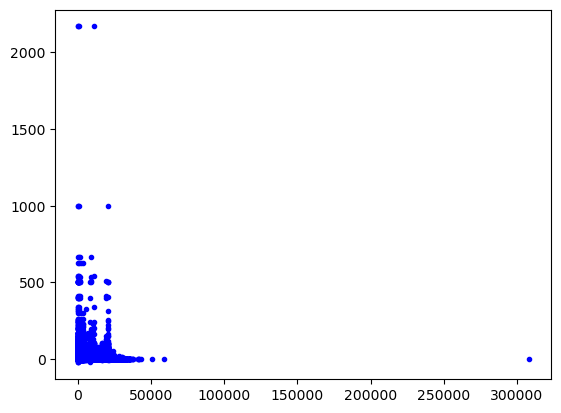

In [134]:
plt.plot(X_train, y_train,"b.")